<div style="border:solid white 2px; padding: 20px">

**Описание проекта**
    
Требуется провести анализ оттока клиентов и подготовить план действий по удержанию клиентов. А именно: научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента; сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства; проанализировать основные признаки, наиболее сильно влияющие на отток; сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
    
    1) выделить целевые группы клиентов;
    
    2) предложить меры по снижению оттока;
    
    3) определить другие особенности взаимодействия с клиентами.

<div style="border:solid white 2px; padding: 20px">

**Описание данных**
    
    - Данные клиента за предыдущий до проверки факта оттока месяц:
 - 'gender' — пол;
 - 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
 - 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
 - Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
 - 'Phone' — наличие контактного телефона;
 - 'Age' — возраст;
 - 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).
    - Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
 - 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
 - 'Group_visits' — факт посещения групповых занятий;
 - 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
 - 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
 - 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
 - 'Churn' — факт оттока в текущем месяце.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

## Обзор данных

In [4]:
def data_overview(data):
    print('Обзор таблицы')
    print('')
    print('')
    print('Первые 5 строк')
    display(data.head())
    print('')
    print('')
    print('Произвольные 5 строк')
    display(data.sample(5))
    print('')
    print('')
    print('Последние 5 строк')
    display(data.tail())
    print('')
    print('')
    print('Размер таблицы')
    display(data.shape)
    print('Информация о пропусках и типах данных')
    print('')
    display(data.info())
    print('')
    print('')
    print('Наличие дубликатов')
    if data.duplicated().sum() > 0:
        print('Дубликатов: ', data.duplicated().sum())
    else:
        print('Дубликатов НЕТ')

In [5]:
data_overview(df)

Обзор таблицы


Первые 5 строк


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0




Произвольные 5 строк


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
1646,1,0,0,0,1,1,0,30,7.987912,1.0,2,1.914342,1.501592,1
1178,0,1,0,0,1,1,0,26,306.916930,1.0,1,0.671913,1.140868,1
62,0,1,1,1,0,6,0,34,72.641112,6.0,2,0.000000,0.000000,0
145,0,0,1,0,1,1,0,22,66.706150,1.0,3,1.853268,2.075719,1
2537,0,1,0,0,1,1,0,33,253.242704,1.0,3,1.306742,1.447407,0




Последние 5 строк


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0
3999,1,0,1,0,0,12,1,30,178.861814,12.0,1,1.101832,1.035270,0




Размер таблицы


(4000, 14)

Информация о пропусках и типах данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequen

None



Наличие дубликатов
Дубликатов НЕТ


Посмотрим на цeлевой признак

In [6]:
df['Churn'].value_counts(normalize = True)*100

0    73.475
1    26.525
Name: Churn, dtype: float64

## Предобработка данных

In [7]:
#приведем названия столбцов к нижнему регистру
df = df.rename(columns=str.lower)
df.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

## Исследовательский анализ данных

### Изучим средние значения и стандартные отклонения

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


Как видно из таблицы, клиенты примерно поровну мужчин и женщин, в основном проживают или работают в районе, где находится фитнес-центр. Посетителей примерно поровну, кто является сотрудником компании-партнера, и кто не является, мало тех, кто использовал промо-код. Средний возраст 29 лет, медианное значение 29 лет, стандартное отклонение небольшое, поэтому разброс небольшой. Минимальный возраст 18 лет, максимальный 41. Длительность текущего абонимента в среднем 4,7 месяцев, но как мы видим стандартное отклонение большое, а медианное значение - 1 месяц. Так же и срок до окончания текущего абонимента в среднем чуть больше 4 месяцев, но при этом большое стандартное отклонение и медианное значение 1 месяц. То есть есть клиенты, которые еще не посетили фитнес-клуб. практически все клиенты оставляют свой контактный номер. В среднем частота посещений в неделю - 1, 2 раза, это видно как из среднего значения, так и из медианного. Групповые занятия посещают реже. Отток составляет около 26%.

### Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [9]:
df.groupby(['churn']).mean().transpose()

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


Клиенты, которые остались, чаще живут или работают в районе, где находится фитнес центр (локация хоть и незначительно, но оказывает влияние). Чаще посетители является сотрудником компании-партнера и используют промо-код. Длительность абонемента около 6 месяцев, возраст примерно 30 лет. Лайфтам около 5 месяцев.

Тех, кто не является сотрудником компании-партнером, уходит на примерно 20% больше, примерно такая же зависимость и при использовании промо-акции. Также чаще уходят те, у кото абонемент не более 2х месяцев, и у кого срок до окончания абонемента примерно 1,5 месяца, у кого лайфтайм в среднем месяц, то есть те, кто не успел задержаться. Возраст попадающих в отток в среднем 27 лет.

### Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

In [10]:
quantitative_feature = df[['contract_period', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
                          'avg_class_frequency_total', 'avg_class_frequency_current_month', 'churn']]

In [11]:
quantitative_feature.head()

,contract_period,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,6,29,14.227470,5.0,3,0.020398,0.000000,0
1,12,31,113.202938,12.0,7,1.922936,1.910244,0
2,1,28,129.448479,1.0,2,1.859098,1.736502,0
3,12,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,26,198.362265,1.0,3,1.113884,1.120078,0


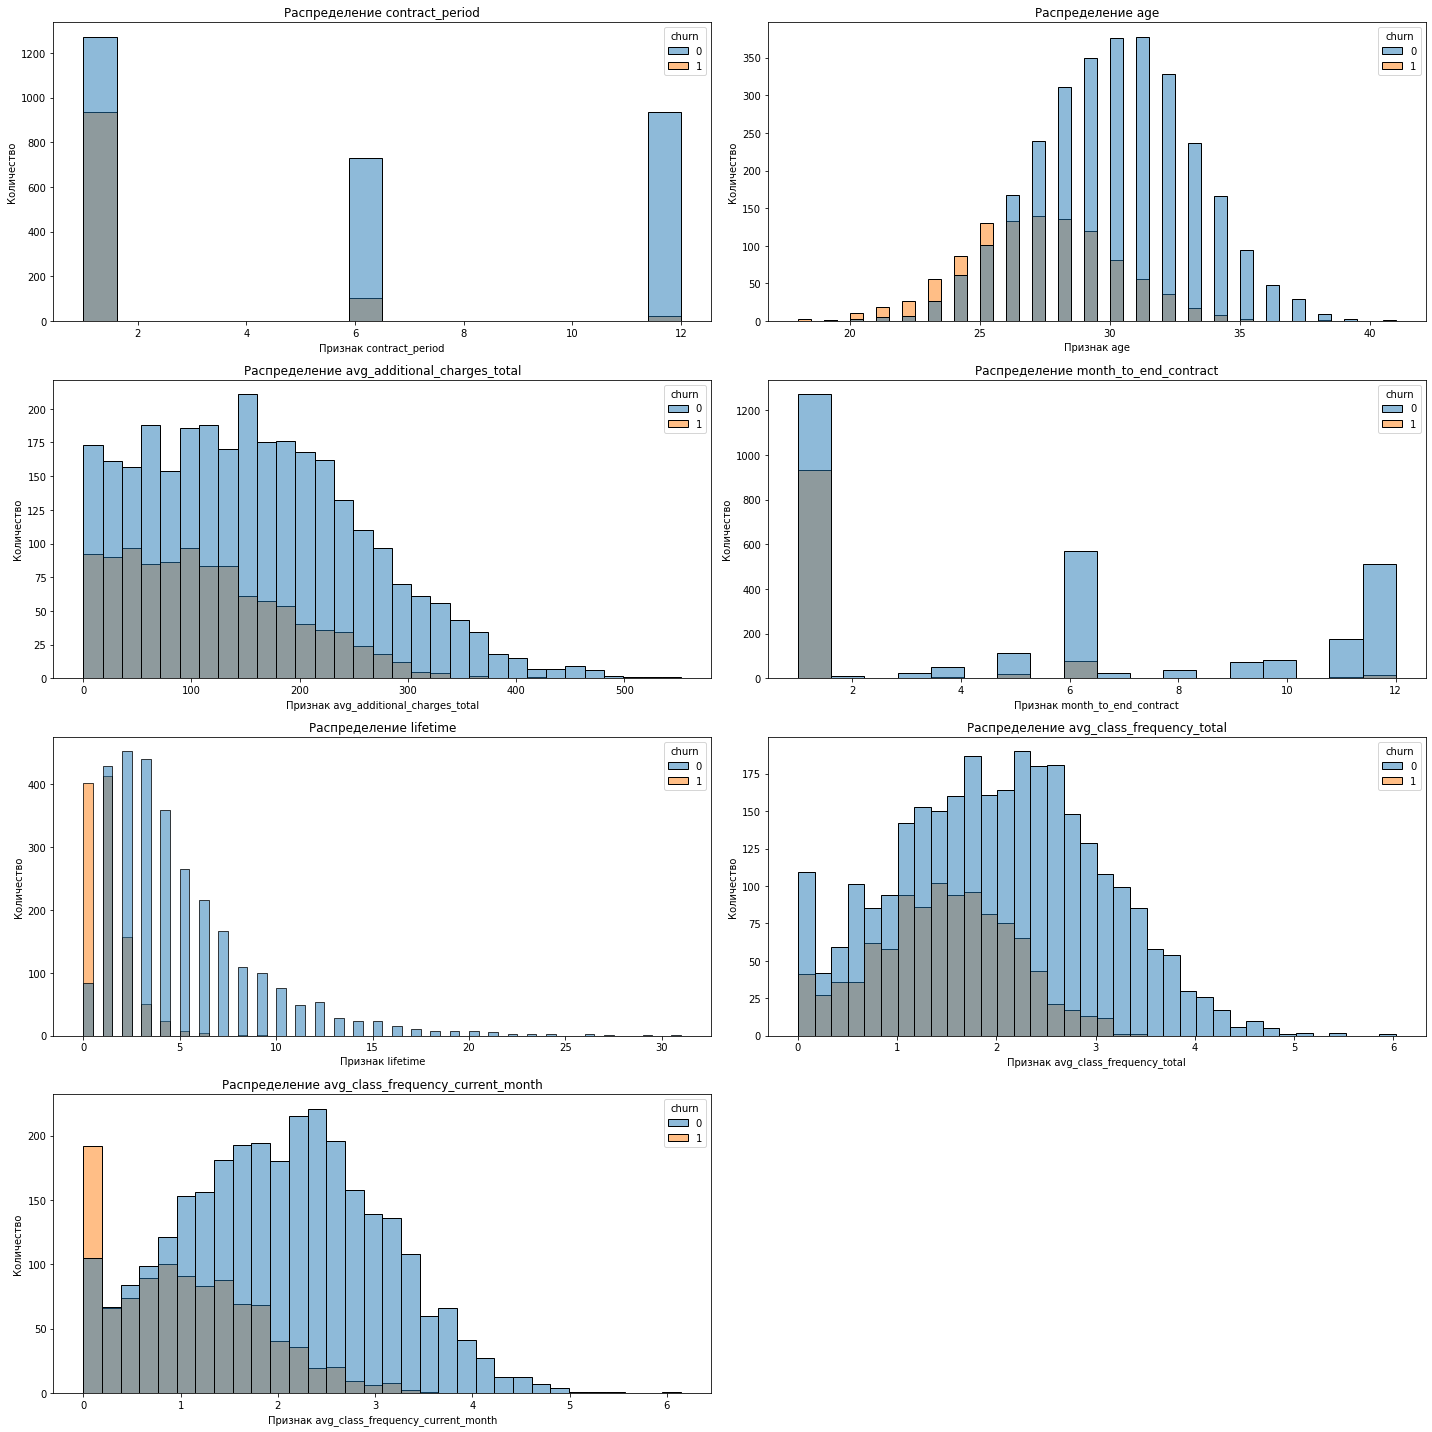

In [12]:
fig=plt.figure(figsize=(20,20))
for i, feature in enumerate(quantitative_feature.drop('churn', axis = 1).columns):
    ax=fig.add_subplot(4,2,i+1)
    sns.histplot(data =quantitative_feature, x=feature, ax=ax, hue ='churn')
    ax.set(xlabel='Признак'+' '+feature,
           ylabel='Количество',
           title = 'Распределение'+' '+feature)
    
fig.tight_layout()  
plt.show()

У кого абонементы 6 месяцев и 1 год, чаще не попадают в отток. Среди попавшив в отток чаще клиенты от 26 до 28 лет, среди тех, кто не попал в отток, возраст примерно от 28 до 32,5 лет. Чаще всего уходят те, у кого срок до окончания абонемента - 1 месяц и у кого прошло 1-2 месяца с первого обращения, а средняя частота посещения в неделю - 1 раз.

In [13]:
category_feature = df[['gender', 'near_location', 'partner', 'promo_friends', 'phone',
                      'group_visits', 'churn']]

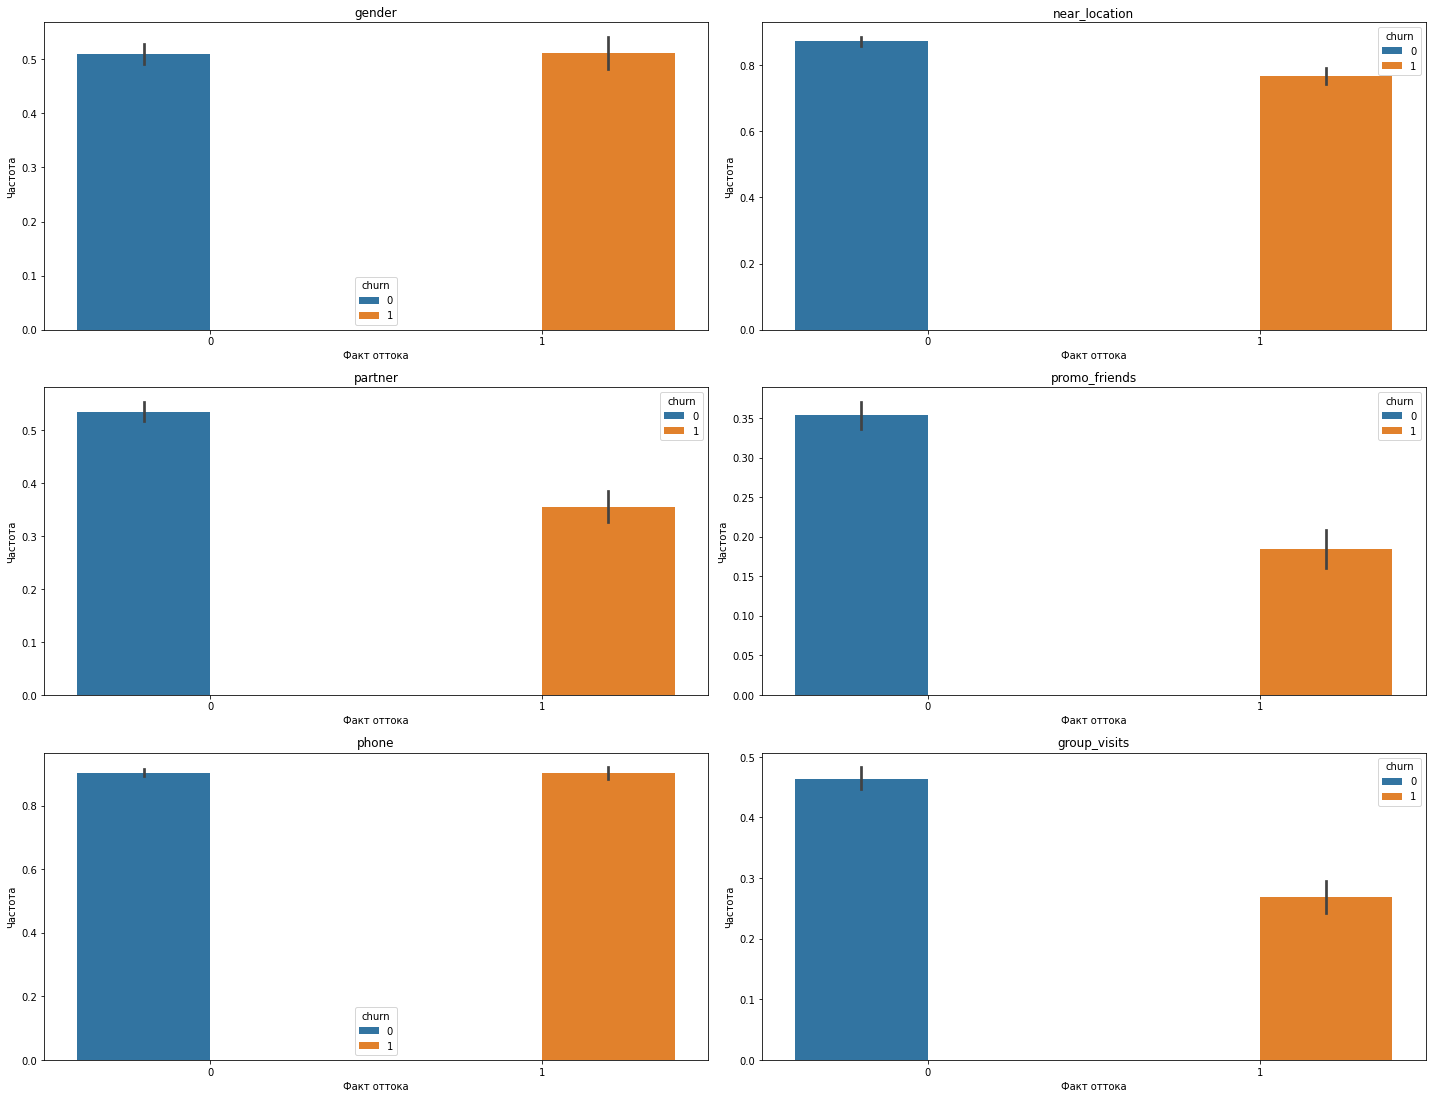

In [14]:
fig=plt.figure(figsize=(20,20))
for i, feature in enumerate(category_feature.drop('churn', axis = 1).columns):
    ax=fig.add_subplot(4,2,i+1)
    sns.barplot(data =category_feature, x='churn', y = feature, ax=ax, hue ='churn')
    ax.set(xlabel='Факт оттока',
           ylabel='Частота',
           title = feature)
    
fig.tight_layout()  
plt.show()

Реже попадают в отток клиенты, которые являются сотдрудниками компании-партнера клуба и кто использовал промо-код при оплате первого абонемента и кто посещает групповые занятия. 

### Посмотрим на матрицу корреляций

In [15]:
corr = df.corr()

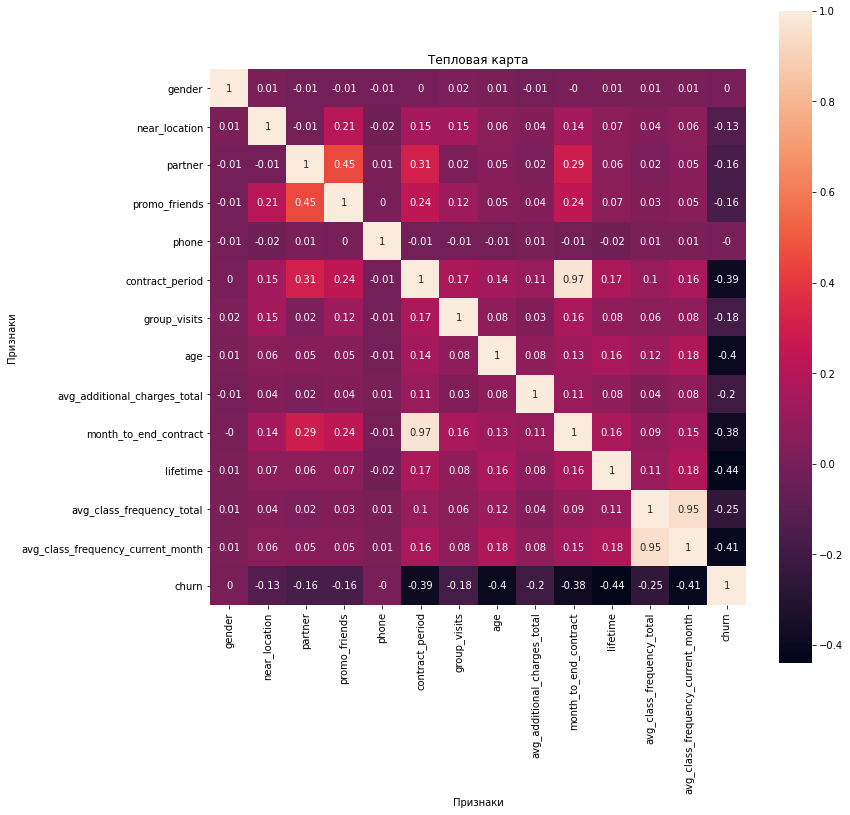

In [16]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr().round(2), annot = True, square = True)
plt.title('Тепловая карта')
plt.xlabel('Признаки')
plt.ylabel('Признаки')
plt.show()

Отток связан с длительностью абонемента, количество времени с момента первого обращения в фитнес-центр, а также 
количеством времени с момента первого обращения в фитнес-центр. Обратная связь.

Очень сильная прямая связь между длительностью абонемента и сроком до окончания абонемента, а также между средней частотой посещений в неделю и суммарной выручкой от других услуг фитнес-центра. То есть мы наблюдаем мультиколлинеарность.

Чтобы не получить переобученную под эти признаки модель, удалим по одному из пары.

In [17]:
anti_multy_df = df.drop(['month_to_end_contract', 'avg_class_frequency_current_month'], axis = 1)
anti_multy_df.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn
0,1,1,1,1,0,6,1,29,14.227470,3,0.020398,0
1,0,1,0,0,1,12,1,31,113.202938,7,1.922936,0
2,0,1,1,0,1,1,0,28,129.448479,2,1.859098,0
3,0,1,1,1,1,12,1,33,62.669863,2,3.205633,0
4,1,1,1,1,1,1,0,26,198.362265,3,1.113884,0


## Mодель прогнозирования оттока клиентов

### Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце

#### Разобъем данные на обучающую и валидационную выборку

In [18]:
# зададим матрицу объект-признак
X = anti_multy_df.drop('churn', axis = 1)

# зададим вектор целевой переменной
y = anti_multy_df['churn']

# разобъем данные на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)


In [19]:
X_train.shape

(3200, 11)

In [42]:
X_test.shape

(800, 11)

#### Обучим модель на train-выборке логистической регрессией

In [20]:
#зададим алгоритм для модели - логистическую регрессию
model = LogisticRegression(solver = 'liblinear', random_state = 0)

# обучим модель на train-выборке
model.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [21]:
# посчитаем прогноз класса после обучения модели
predictions = model.predict(X_test)

#probabilities = model.predict_proba(X_test)[:,1]

#### Оценим метрики accuracy, precision и recall для модели, обученной логистической регрессией

In [22]:
# посчитаем долю правильных ответов
acc = accuracy_score(y_test, predictions)
acc.round(2)

0.88

в 88% случаев модель предсказала ушедших клиентов

In [23]:
# посчитаем точность (процент точно предсказанных ушедших клиентов)
precision = precision_score(y_test, predictions)
precision.round(2)

0.76

из всех ушедших клиентов модель отметила 76% (как ушедших) 

In [24]:
# посчитаем полноту (насколько хорошо модель обнаруживает ушедшего клиента)
recall = recall_score(y_test, predictions)
recall.round(2)

0.77

Модель пропускает (не обнаруживает) 23% ушедших клиентов из 100 

#### Обучим модель на train-выборке случайным лесом

In [25]:
#Обучим модель на train-выборке случайным лесом
rf_model = RandomForestClassifier(random_state = 0)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

#### Оценим метрики accuracy, precision и recall для модели, обученной случайным лесом

In [26]:
# посчитаем прогноз класса после обучения модели
rf_predictions = rf_model.predict(X_test)

In [27]:
rf_acc = accuracy_score(y_test, rf_predictions)
rf_acc.round(2)

0.89

в 89% случаев модель предсказала ушедших клиентов

In [28]:
rf_precision = precision_score(y_test, rf_predictions)
rf_precision.round(2)

0.78

из всех ушедших клиентов модель отметила 78% (как ушедших) 

In [29]:
rf_recall = recall_score(y_test, rf_predictions)
rf_recall.round(2)

0.77

Модель пропускает (не обнаруживает) 23% ушедших клиентов из 100 

Отличается только метрика accuracy на 1%

## Кластеризация клиентов

### Построим дендрограмму

In [30]:
# приведем признаки к единому масштабу
sc = StandardScaler()
X_sc = sc.fit_transform(df)

# в переменной linked сохраним таблицу «связок» между объектами
linked = linkage(X_sc, method = 'ward') 
linked[:5]

array([[9.70000000e+01, 3.22200000e+03, 1.00990653e-01, 2.00000000e+00],
       [2.61000000e+02, 3.17900000e+03, 1.22634574e-01, 2.00000000e+00],
       [8.90000000e+02, 1.75000000e+03, 1.28123291e-01, 2.00000000e+00],
       [2.10100000e+03, 3.77300000e+03, 1.44188037e-01, 2.00000000e+00],
       [7.50000000e+01, 1.64600000e+03, 1.46525871e-01, 2.00000000e+00]])

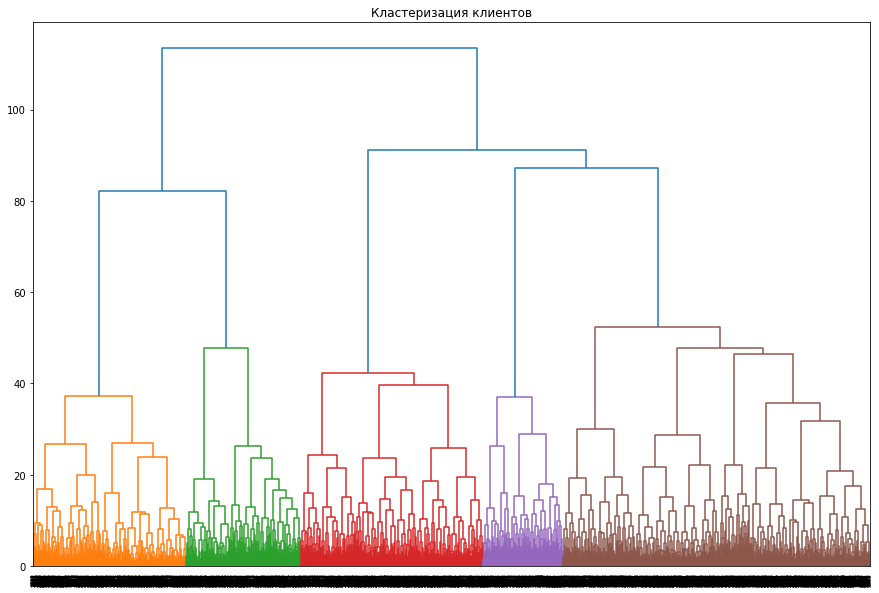

In [31]:
# визуализируем таблицу «связок» как дендрограмму
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Кластеризация клиентов')
plt.show() 

Предложенное оптимальное число кластеров 5 — пять разных цветов на графике

### Обучим модель кластеризации на основании алгоритма K-Means

In [32]:
# зададим число кластеров, равное 5
km = KMeans(n_clusters = 5, random_state = 0)

In [33]:
# применим алгоритм к данным и сформируем вектор кластеров
labels = km.fit_predict(X_sc)

In [34]:
# сохраним метки кластера в датафрейме
df['cluster'] = labels

### Посмотрим на средние значения признаков для кластеров

In [35]:
# посмотрим на средние значения признаков для кластеров
cluster_df = df.groupby(['cluster']).mean()
cluster_df.transpose()

cluster,0,1,2,3,4
gender,0.503676,0.492829,0.507917,0.521186,0.518895
near_location,0.000000,0.936115,1.000000,0.996610,0.968023
partner,0.459559,0.764016,0.323995,0.282203,0.744186
promo_friends,0.075368,0.534550,0.213155,0.208475,0.526163
phone,0.917279,0.919166,0.903776,0.904237,0.873547
contract_period,2.069853,10.447197,1.546894,1.882203,8.859012
group_visits,0.211397,0.516297,0.287454,0.452542,0.534884
age,28.522059,29.962190,26.926918,30.237288,29.728198
avg_additional_charges_total,132.741216,161.853561,113.173051,157.988625,162.907495
month_to_end_contract,1.950368,9.477184,1.500609,1.794915,8.155523


Сразу можно отметить, что, например, к кластеру 0 относятся клиенты, которые не проживают и не работают рядом с фитнес-центром.

К кластеру 1 относятся клиенты с длительностью абонемента в среднем 10 месяцев и сроком до окончания действия абонемента - 9 месяцев, средняя частота посещения посещения в неделю - 3 раза. 

К кластеру 2 - клиенты с возрастом 27 лет и с лайфтаймом 1 месяц. 

К кластеру 3 - со сроком до окончания действия абонемента - 2 месяца, возраст 30 лет. 

К кластеру 4 - клиенты с длительностью абонемента в среднем 9 месяцев со средней частотой посещений в неделю за все время - 1 раз.

Самый большой отток у кластера 2, самый низкий у 1 и 3.

В общем, все кластеры имеют отличные друг от друга признаки.

### Построим распределения признаков для кластеров

In [36]:
quantitative_feature = df[['contract_period', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
                          'avg_class_frequency_total', 'avg_class_frequency_current_month', 'cluster']]

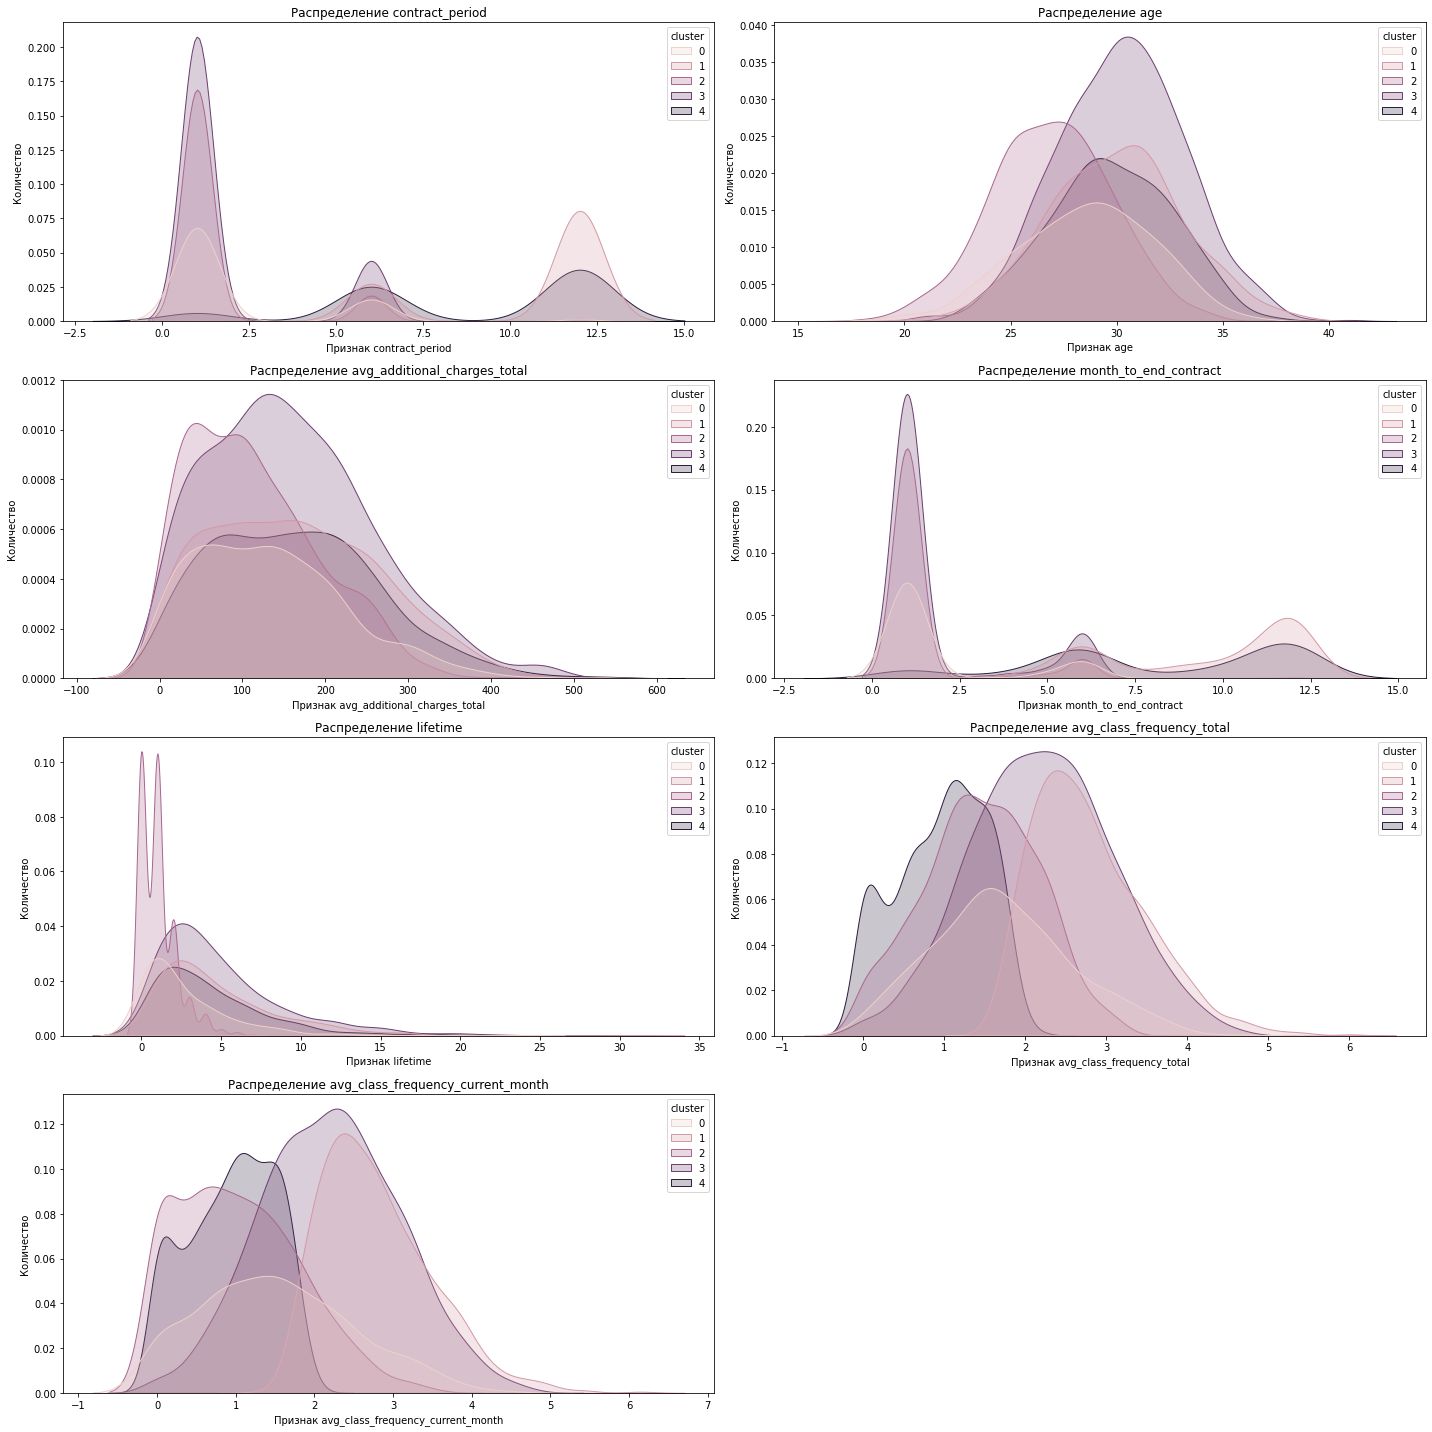

In [37]:
fig=plt.figure(figsize=(20,20))
for i, feature in enumerate(quantitative_feature.drop('cluster', axis = 1).columns):
    ax=fig.add_subplot(4,2,i+1)
    sns.kdeplot(data =quantitative_feature, x=feature, ax=ax, hue ='cluster', fill=True)
    ax.set(xlabel='Признак'+' '+feature,
           ylabel='Количество',
           title = 'Распределение'+' '+feature)
    
fig.tight_layout()  
plt.show()

У клиентов в 0, 2 и 3 кластеров длительность действующего абонемента чаще 1 месяц, в 1 кластере - 12 месяцев, в 4 кластере - 6  месяцев.

В кластере 0 чаще клиенты в возрасте 29 лет, в 1 кластере - 31, во 2 - 26-27, в 3 - 31, в 4 - 29-30. 

В 1, 3, 4 кластерах выручка примерно одинаковая, чуть меньше в 0 кластере, самая низкая - во 2.

Срок до окончания текущего действующего абонемента идентичен длительности действующего абонемента.

У клиентов 0 и 2 кластера время с момента первого обращения в фитнес центр меньше, чем в остальных кластерах.

Самые частые посещения в неделю за все в ремя с начала действия абонемента у клиентов в 1 кластере, немного реже посещают клиенты из 3 кластера. Реже всего - из 4 кластера.

Аналогично с частотой посещения в неделю за предыдущий месяц.

In [38]:
category_feature = df[['gender', 'near_location', 'partner', 'promo_friends', 'phone',
                      'group_visits', 'cluster', 'churn']]

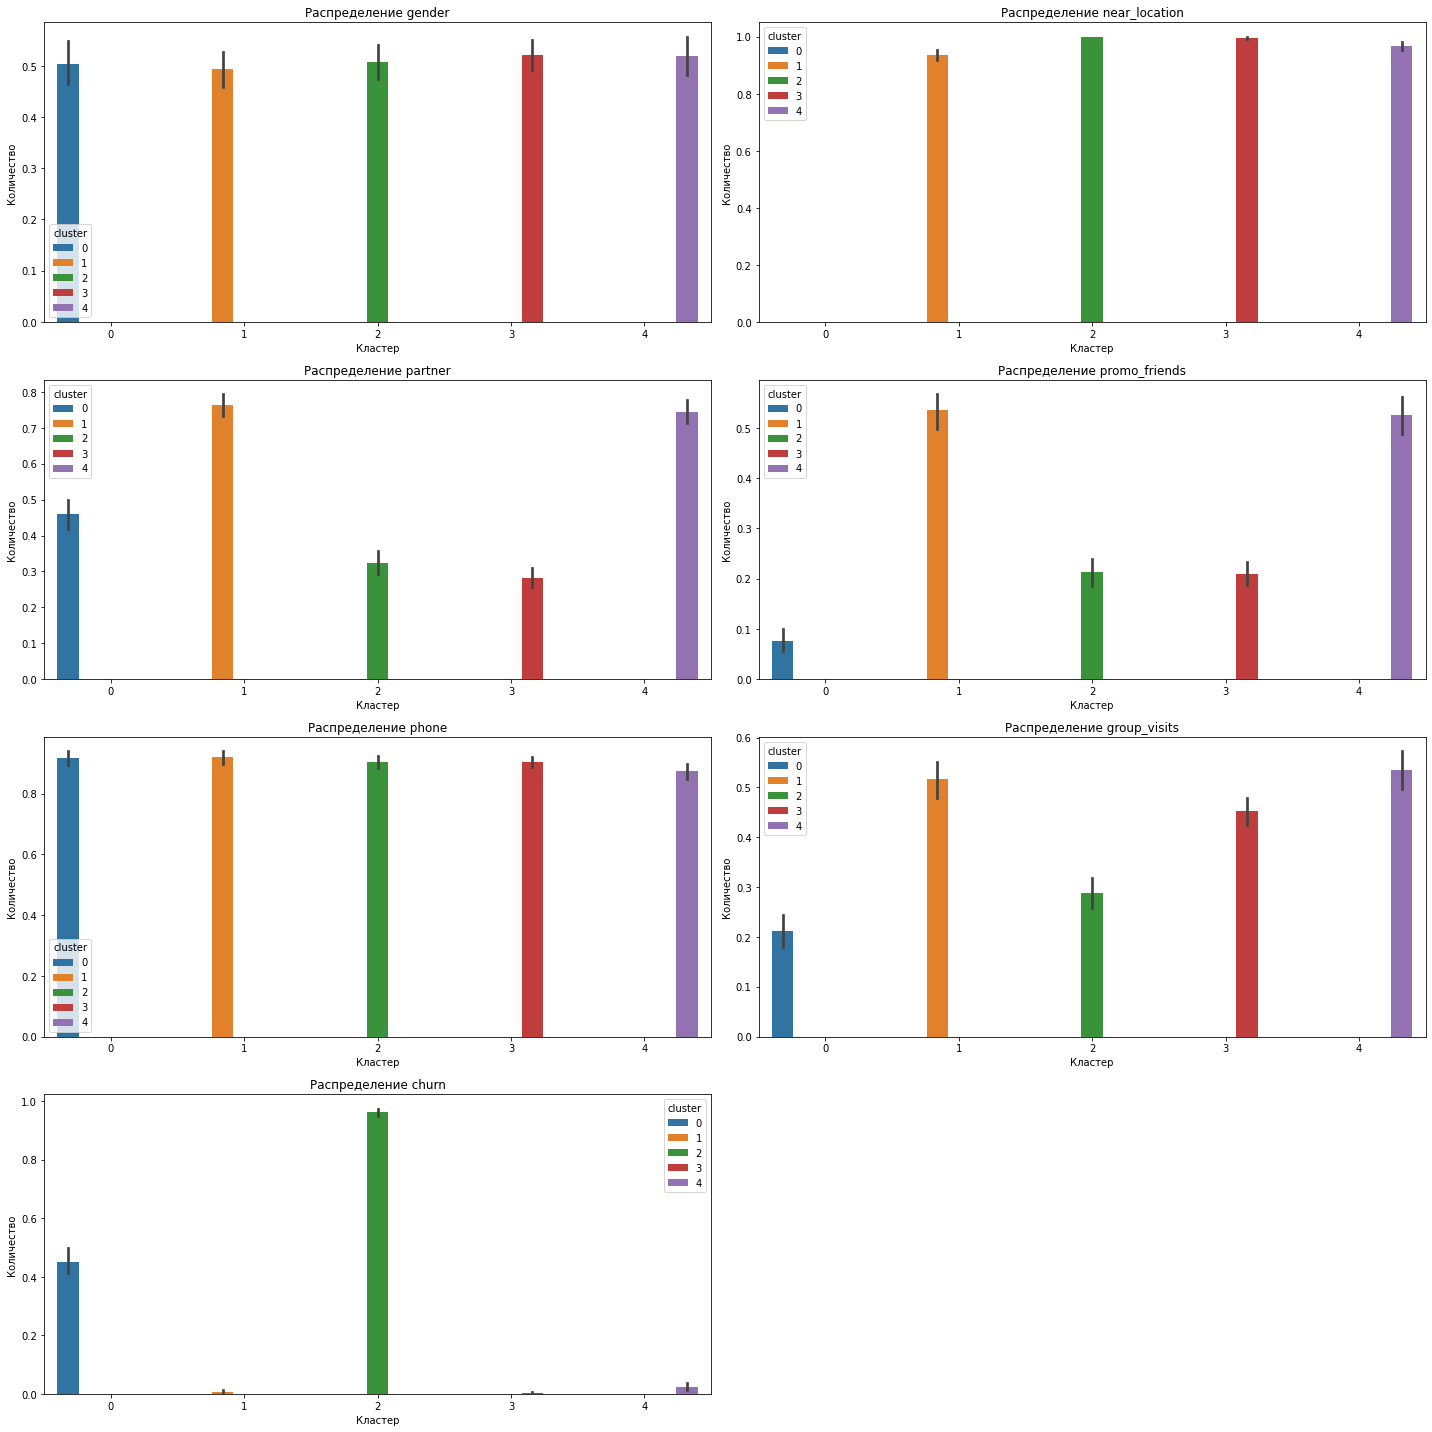

In [39]:
fig=plt.figure(figsize=(20,20))
for i, feature in enumerate(category_feature.drop('cluster', axis = 1).columns):
    ax=fig.add_subplot(4,2,i+1)
    sns.barplot(data =category_feature, x='cluster', y = feature, ax=ax, hue ='cluster')
    ax.set(xlabel='Кластер',
           ylabel='Количество',
           title ='Распределение'+' '+feature)
    
fig.tight_layout()  
plt.show()

Клиенты из 1 кластера живут или работают не в районе, где находится фитнес-центр.
В кластерах 1 и 4 клиенты чаще являются сотрудниками компаний-партнеров клуба, так же как клиенты, которые пришли по промо-коду, а вот 0 кластере клиенты редко приходят по промо-коду. Также клиенты 0 кластера живут и работают не в районе фитнес-центра. Чаще всего групповые занятия посещают клиенты в 1 и 4 кластерах, реже всего в 0 кластере.

In [40]:
ratio_churn = df.groupby('cluster')['churn'].sum()/df.groupby('cluster')['churn'].count()
(ratio_churn*100).round(2).sort_values(ascending = False)

cluster
2    96.10
0    45.04
4     2.47
1     0.78
3     0.34
Name: churn, dtype: float64

Клиенты с минимальным оттоком попали в 1, 3 и 4 кластеры

## Общий вывод

Согласно проведенному анализу клиентов примерно поровну мужчин и женщин, в основном проживают или работают в районе, где находится фитнес-центр.
Средний возраст 29 лет. Минимальный возраст 18 лет, максимальный 41.
В среднем частота посещений в неделю - 1, 2 раза.
Отток составляет около 26%

Согласно средним значениям признаков в двух группах — тех, кто ушел в отток и тех, кто остался, Клиенты, которые остались, чаще живут или работают в районе, где находится фитнес центр (локация хоть и незначительно, но оказывает влияние). Чаще посетители является сотрудником компании-партнера и используют промо-код. Длительность абонемента около 6 месяцев, возраст примерно 30 лет. Лайфтам около 5 месяцев.

Тех, кто не является сотрудником компании-партнером, уходит на примерно 20% больше, примерно такая же зависимость и при использовании про-акции. Также чаще уходят те, у кото абонемент не более 2х месяцев, и у кого срок до окончания абонемента примерно 1,5 месяца, у кого лайфтайм в среднем месяц, то есть те, кто не успел задержаться. Возраст попадающих в отток в среднем 27 лет.
Таким образом, на отток оказывают влияние локация, длительность абонемента, лайфтайм, то есть сколько прошло времени от первого обращения, возраст (до 30 лет чаще попадают в отток), а также факт того, является ли клиент сотрудником компании-партнером и использовал ли промо-код.

Согласно кластеризации, клиенты с минимальным оттоком попали в 1, 3 и 4 кластеры. Это клиенты, у которых длительность действующего абонемента 1, 6 и 12 месяцев, возраст от 29 до 31 года. В кластерах 1 и 4 клиенты чаще являются сотрудниками компаний-партнеров клуба, так же как клиенты, которые пришли по промо-коду.

У клиентов 0 и 2 кластера (которые попали в отток) время с момента первого обращения в фитнес центр меньше, чем в остальных кластерах.

На основании проведенного анализа можно сделать следующий вывод: клиенты, которые имеют длительные абонементы (6 и 12 месяцев), работают или живут в районе фитнес-центра, являются сотрудниками компаний-партнеров клуба, так же как клиенты, которые пришли по промо-коду реже попадают в отток. Поэтому чтобы снизить отток, необходимо больше сотрудничать с компаниями, которые расположены в непосредственной близости с фитнес-центром, привлекать клиентов к покупке более длительных абонементов, например, на абонементы 6 и 12 месяцев делать скидку пропорционально длительности абонемента. Так как чаще посещают клиенты, живущие рядом, то запустить таргетированную и контекстную рекламы по локации. Также клиентов, у которых срок текущего абонемента подходит к концу, привлекать к покупке следующего абонемента, можно так же за счет скидки, либо дополнительных занятий в подарок.
